In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.shape

(8124, 23)

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#target, edible or poisonous 
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
#checking for nulls
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
for col in df.columns: 
    print(df[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [13]:
#re-assign all binary columns to 0 and 1
df['bruises']=np.where(df['bruises']=='t',1,df['bruises'])
df['bruises']=np.where(df['bruises']=='f',0,df['bruises'])

In [14]:
df['bruises'].value_counts()

0    4748
1    3376
Name: bruises, dtype: int64

In [15]:
df['gill-attachment']=np.where(df['gill-attachment']=='f',0,df['gill-attachment'])
df['gill-attachment']=np.where(df['gill-attachment']=='a',1,df['gill-attachment'])

In [16]:
df['gill-spacing']=np.where(df['gill-spacing']=='c',0,df['gill-spacing'])
df['gill-spacing']=np.where(df['gill-spacing']=='w',1,df['gill-spacing'])
df['gill-size']=np.where(df['gill-size']=='b',0,df['gill-size'])
df['gill-size']=np.where(df['gill-size']=='n',1,df['gill-size'])
df['stalk-shape']=np.where(df['stalk-shape']=='e',0,df['stalk-shape'])
df['stalk-shape']=np.where(df['stalk-shape']=='t',1,df['stalk-shape'])

In [17]:
#assign missing values to 'other'
df['stalk-root']=np.where(df['stalk-root']=='?','other',df['stalk-root'])

In [18]:
#dropping veil-type column since values are all the same
#no use in the model
df.drop(columns='veil-type',inplace=True)

In [19]:
#re-assign to actual ring number, 0, 1, 2 -> numerical data
df['ring-number']=np.where(df['ring-number']=='n',0,df['ring-number'])
df['ring-number']=np.where(df['ring-number']=='o',1,df['ring-number'])
df['ring-number']=np.where(df['ring-number']=='t',2,df['ring-number'])

In [20]:
df.shape

(8124, 22)

In [21]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,0,n,0,0,0,b,...,s,s,w,w,w,1,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


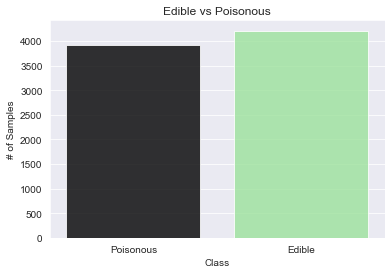

In [23]:
#target variable countplot
#balanced target
sns.set_style('darkgrid')
plt.figure()
fig1=sns.countplot(df['class'], alpha =.80, palette= ['black','lightgreen'])
plt.title('Edible vs Poisonous')
plt.ylabel('# of Samples')
plt.xlabel('Class')
fig1.set(xticklabels=['Poisonous','Edible'])
plt.show()

In [24]:
features=df.drop(columns='class')

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-p

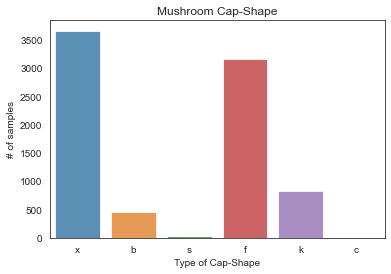

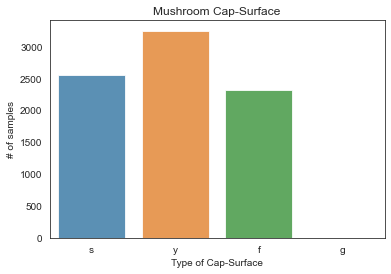

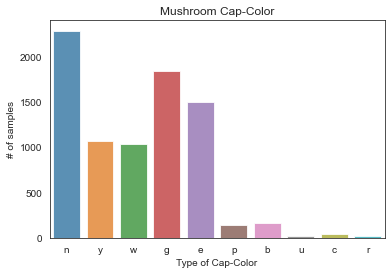

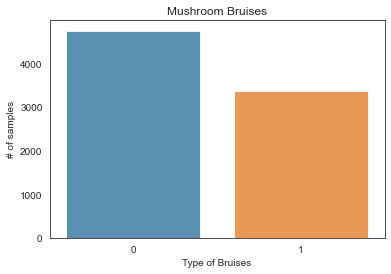

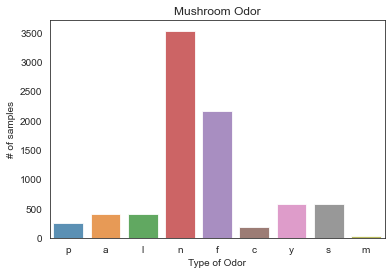

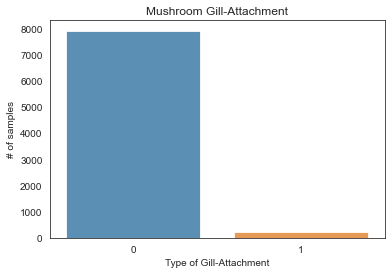

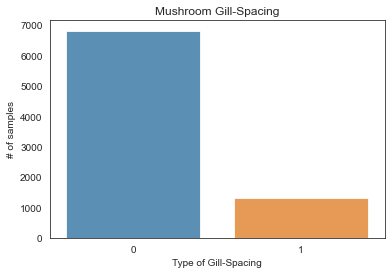

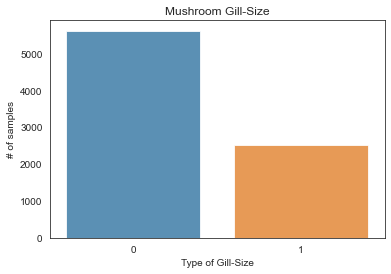

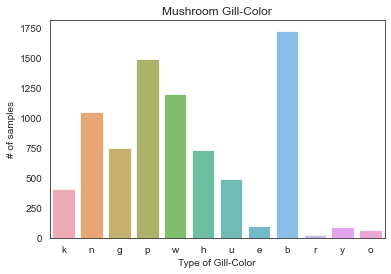

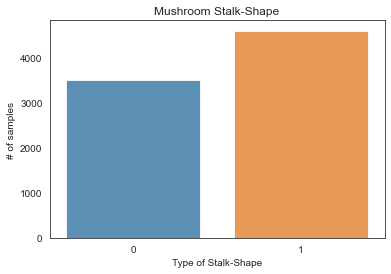

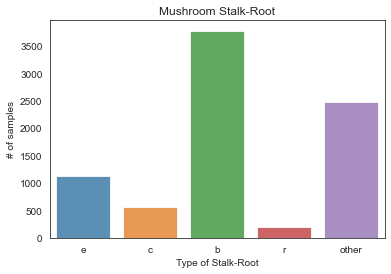

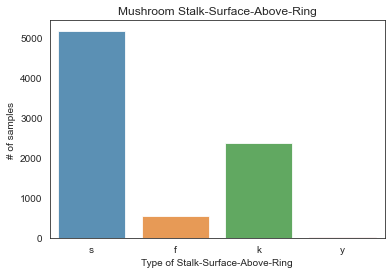

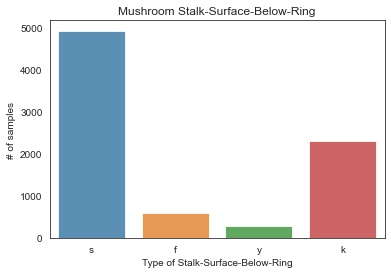

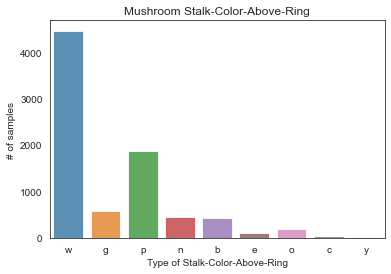

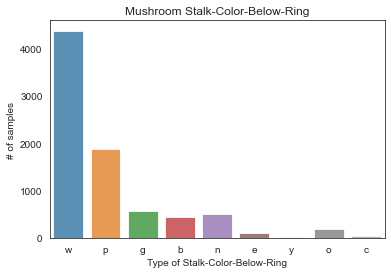

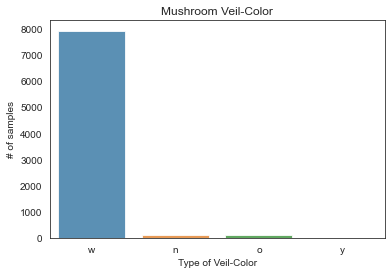

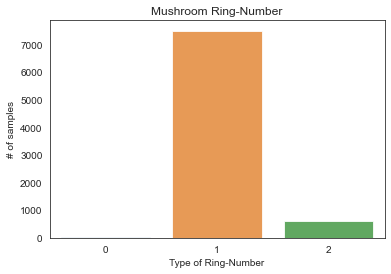

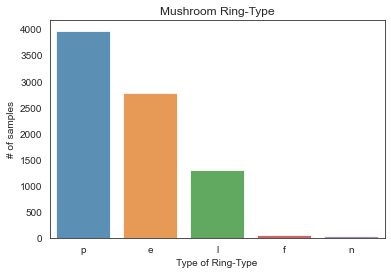

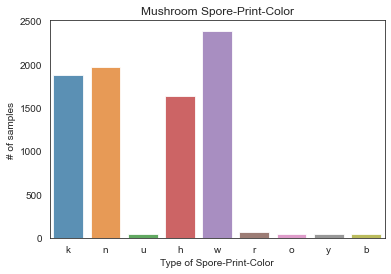

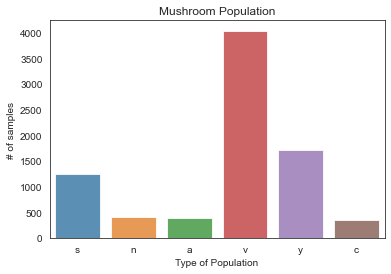

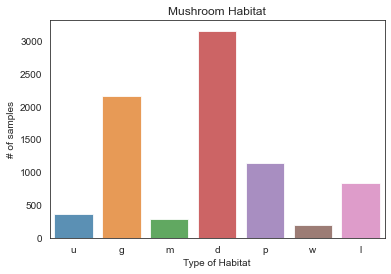

In [25]:
#barplots for each feature
#breakout of categories -> # of samples per value of each category 
#Habitat, mushroom gill color for examples
for col in features.columns:
    sns.set_style('white')
    plt.figure()
    sns.countplot(features[col],alpha =.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    

plt.show()

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DEEL\anaconda3\lib\site-p

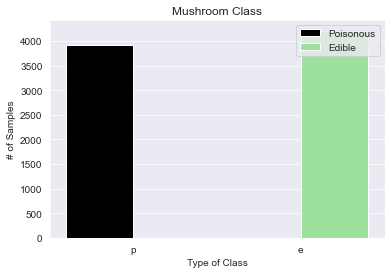

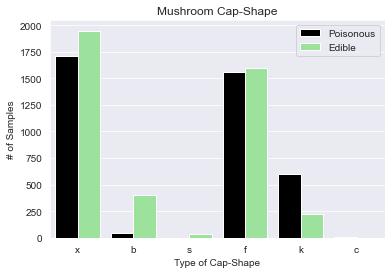

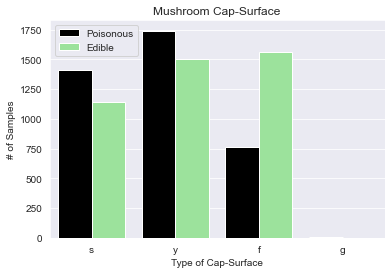

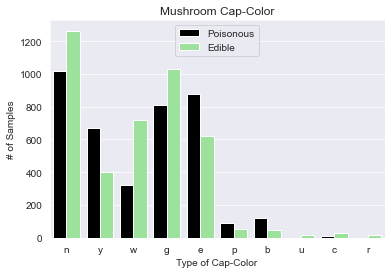

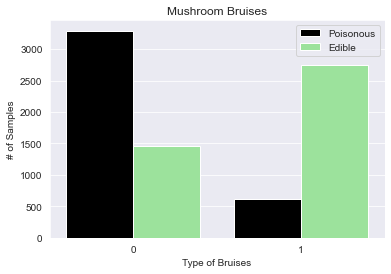

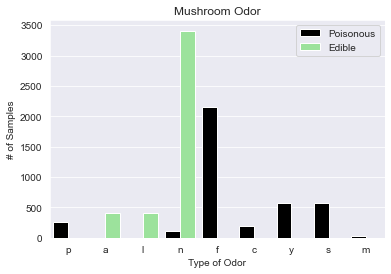

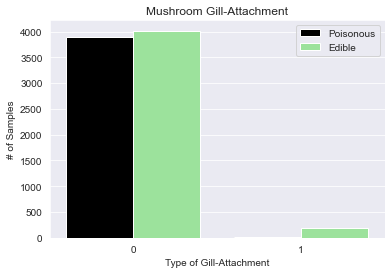

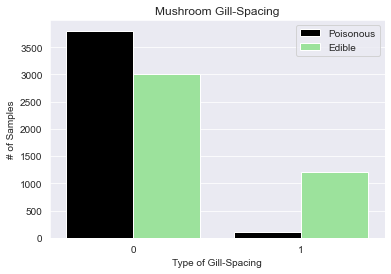

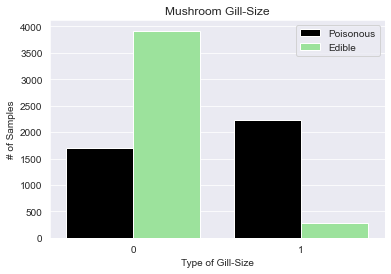

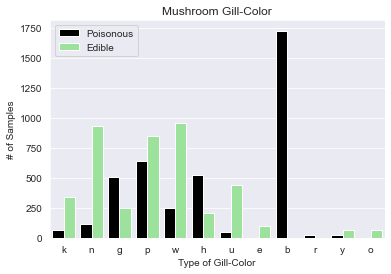

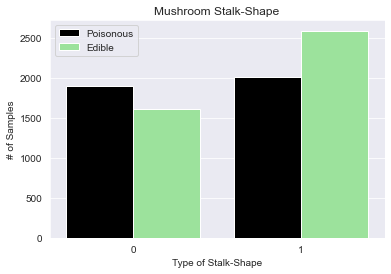

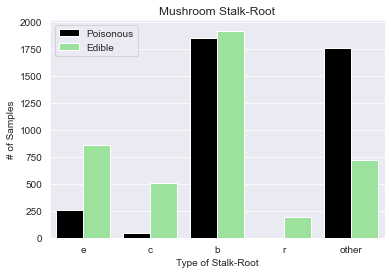

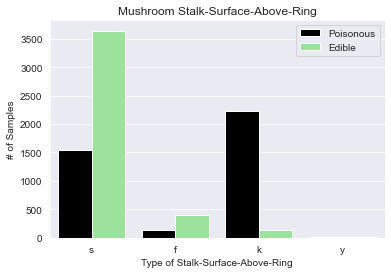

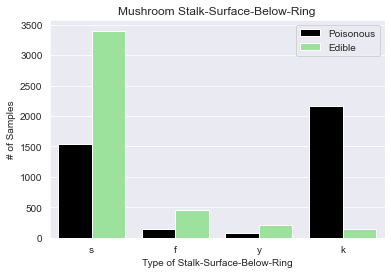

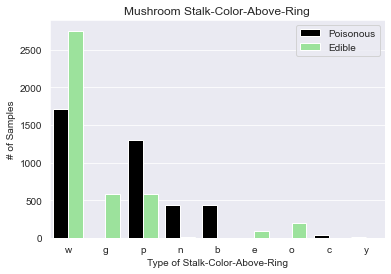

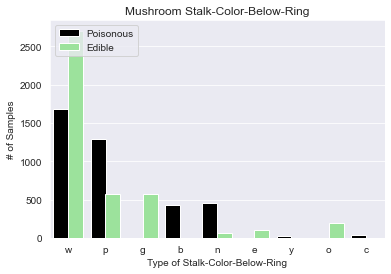

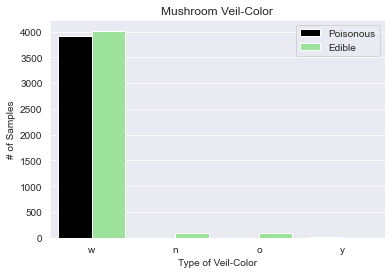

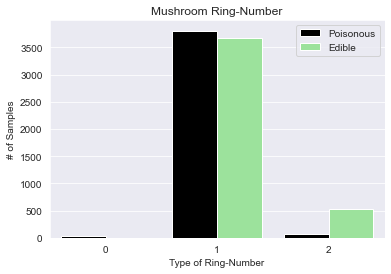

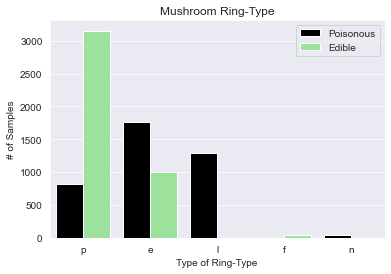

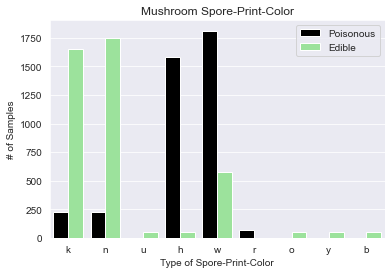

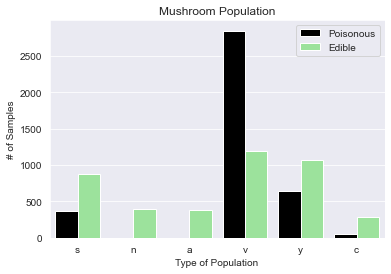

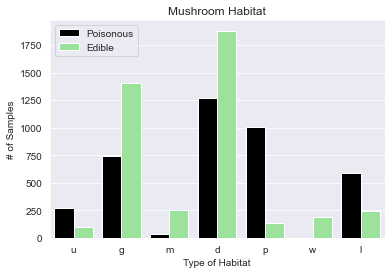

In [27]:
#population, gill color, ringtype, odor, surface above and below ring, spore-print color all have strong categories which point to poisonous/show seperation
#barplots for each feature/stacked with class
# # of mushrooms which are edible/poisonous based on category
#stalk shape not super insightful or veil color
for col in df:
    fig,ax = plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(col,hue=df['class'],palette=['black','lightgreen'],data=df)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])

In [29]:
#pickling data before one-hot encoding
import pickle
df.to_pickle('EDAdata.pkl')

In [30]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,1,p,0,0,1,k,...,s,s,w,w,w,1,p,k,s,u
1,e,x,s,y,1,a,0,0,0,k,...,s,s,w,w,w,1,p,n,n,g
2,e,b,s,w,1,l,0,0,0,n,...,s,s,w,w,w,1,p,n,n,m
3,p,x,y,w,1,p,0,0,1,n,...,s,s,w,w,w,1,p,k,s,u
4,e,x,s,g,0,n,0,1,0,k,...,s,s,w,w,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,0,n,1,0,0,y,...,s,s,o,o,o,1,p,b,c,l
8120,e,x,s,n,0,n,1,0,0,y,...,s,s,o,o,n,1,p,b,v,l
8121,e,f,s,n,0,n,1,0,0,n,...,s,s,o,o,o,1,p,b,c,l
8122,p,k,y,n,0,y,0,0,1,b,...,s,k,w,w,w,1,e,w,v,l


In [32]:
df1=pd.DataFrame(df)
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,1,p,0,0,1,k,...,s,s,w,w,w,1,p,k,s,u
1,e,x,s,y,1,a,0,0,0,k,...,s,s,w,w,w,1,p,n,n,g
2,e,b,s,w,1,l,0,0,0,n,...,s,s,w,w,w,1,p,n,n,m
3,p,x,y,w,1,p,0,0,1,n,...,s,s,w,w,w,1,p,k,s,u
4,e,x,s,g,0,n,0,1,0,k,...,s,s,w,w,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,0,n,1,0,0,y,...,s,s,o,o,o,1,p,b,c,l
8120,e,x,s,n,0,n,1,0,0,y,...,s,s,o,o,n,1,p,b,v,l
8121,e,f,s,n,0,n,1,0,0,n,...,s,s,o,o,o,1,p,b,c,l
8122,p,k,y,n,0,y,0,0,1,b,...,s,k,w,w,w,1,e,w,v,l


In [33]:
y=df1['class']
x=df1.drop(['class','bruises','gill-attachment','gill-spacing','gill-size','stalk-shape','ring-number'],axis=1)

In [34]:
df2=pd.get_dummies(x,drop_first=True)
#creating dummies for all features that are not binary or ordinal/numeric

In [35]:
df2.shape

(8124, 88)

In [37]:
df_final=pd.concat([df1,df2],axis=1)
df_final

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,x,s,n,1,p,0,0,1,k,...,0,1,0,0,0,0,0,0,1,0
1,e,x,s,y,1,a,0,0,0,k,...,1,0,0,0,1,0,0,0,0,0
2,e,b,s,w,1,l,0,0,0,n,...,1,0,0,0,0,0,1,0,0,0
3,p,x,y,w,1,p,0,0,1,n,...,0,1,0,0,0,0,0,0,1,0
4,e,x,s,g,0,n,0,1,0,k,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,0,n,1,0,0,y,...,0,0,0,0,0,1,0,0,0,0
8120,e,x,s,n,0,n,1,0,0,y,...,0,0,1,0,0,1,0,0,0,0
8121,e,f,s,n,0,n,1,0,0,n,...,0,0,0,0,0,1,0,0,0,0
8122,p,k,y,n,0,y,0,0,1,b,...,0,0,1,0,0,1,0,0,0,0


In [38]:
df_final.drop(columns=['cap-shape','cap-surface','cap-color','odor','gill-color','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-type','spore-print-color','population','habitat'],inplace=True)


In [39]:
df_final

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,e,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,e,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,p,0,0,0,1,1,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [40]:
corr=df_final.corr()
corr[abs(corr>.50)]

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cap-shape_c,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_f,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_k,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_s,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_x,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
habitat_m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
habitat_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
habitat_u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


<AxesSubplot:>

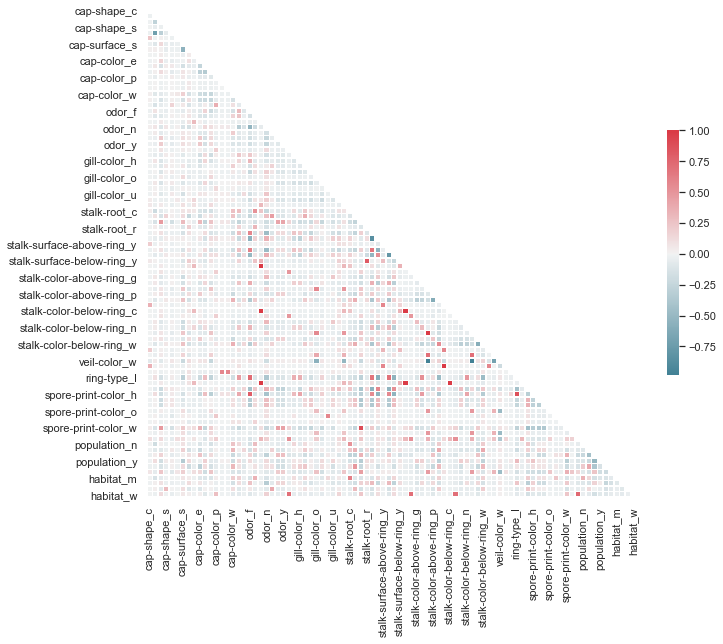

In [41]:
sns.set(style="white")


# Compute the correlation matrix
corr = df_final.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
df_final.to_csv('final_mushroom_data.csv')
#final processed data for modeling

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


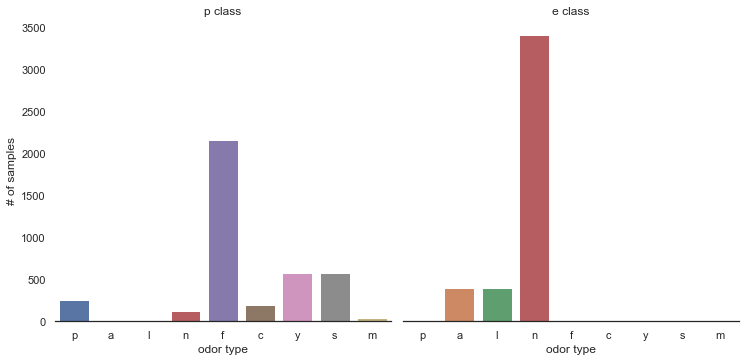

In [44]:
#more visualizations using catplot
g=sns.catplot('odor',col='class',data=df,kind='count',col_wrap=4)
g.set_axis_labels("odor type", "# of samples")
g.set_titles("{col_name} {col_var}")
g.despine(left=True)

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


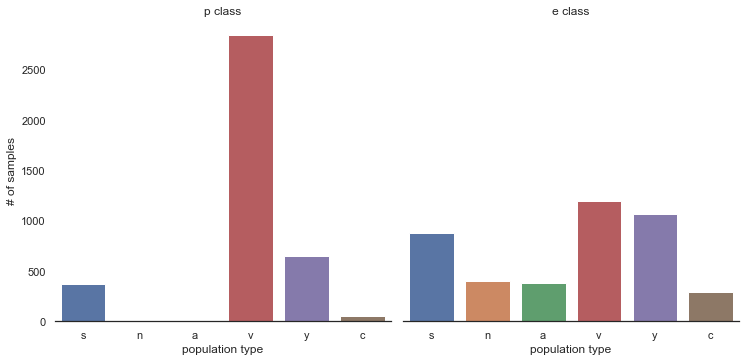

In [45]:
g=sns.catplot('population',col='class',data=df,kind='count',col_wrap=4)
g.set_axis_labels("population type", "# of samples")
g.set_titles("{col_name} {col_var}")
g.despine(left=True)

C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DEEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


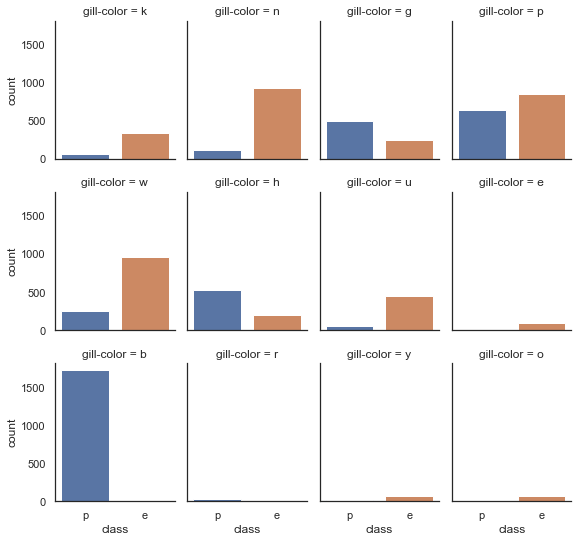

In [46]:
sns.factorplot('class',col='gill-color',data=df1,kind='count',height=2.5,aspect=.8,col_wrap=4)